In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
bus = pd.read_csv('/Users/melek/CATS-CaliforniaTestSystem/GIS/CATS_buses.csv')
branches = pd.read_csv('/Users/melek/CATS-CaliforniaTestSystem/MATPOWER/branch.csv')
CalEnv= pd.read_excel('/Users/melek/Desktop/Research/Research_Winter_2024/calenviroscreen40resultsdatadictionaryf2021/calenviroscreen40resultsdatadictionary_F_2021.xlsx')
# display(bus)
# display(branches)
# display(CalEnv)

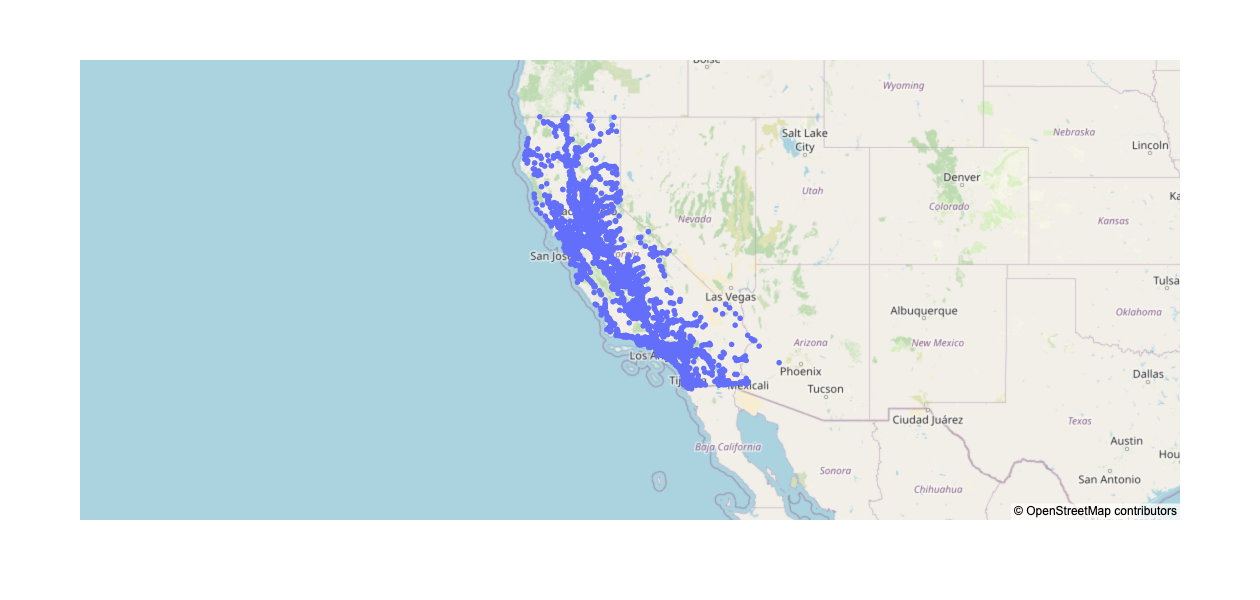

In [9]:
fig = px.scatter_mapbox(bus,
                         lat="Lat",
                         lon="Lon",
                         zoom=4)
fig.update_layout(mapbox_style="open-street-map",
                  width=1200,  # Adjust width as needed
                  height=600) 
fig.show()

In [4]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from sklearn.neighbors import BallTree

In [38]:
CATS_nodes = gpd.GeoDataFrame({
        'geometry': Point(a, b),
        'x': a,
        'y': b,
    } for a, b in zip(np.array(bus['Lat']),np.array(bus['Lon']))
)
CalEnv_nodes = gpd.GeoDataFrame([{
        'geometry': Point(a, b),
        'x': a,
        'y': b,
    } for a, b in zip(np.array(CalEnv['Latitude']),np.array(CalEnv['Longitude']))
])
# Create a BallTree 
tree = BallTree(CalEnv_nodes[['x', 'y']].values, leaf_size=2)

# Query the BallTree on each feature from 'appart' to find the distance
# to the nearest 'pharma' and its id
CATS_nodes['distance_nearest'], CATS_nodes['id_nearest'] = tree.query(
    CATS_nodes[['x', 'y']].values, # The input array for the query
    k=1, # The number of nearest neighbors
)
mapping_CenTra = dict(zip(CATS_nodes['id_nearest'], CalEnv['Census Tract']))
CATS_nodes['CensusTract'] = CATS_nodes['id_nearest'].map(mapping_CenTra)

mapping_ZipCode = dict(zip(CATS_nodes['id_nearest'], CalEnv['ZIP']))
CATS_nodes['ZipCode'] = CATS_nodes['id_nearest'].map(mapping_ZipCode)

In [39]:
CATS_nodes

,geometry,x,y,distance_nearest,id_nearest,CensusTract,ZipCode
0,POINT (37.772 -122.243),37.772436,-122.242916,0.007413,3492,6.073016e+09,92020.0
1,POINT (37.778 -121.626),37.778482,-121.625951,0.079903,4388,6.097154e+09,95421.0
2,POINT (37.748 -121.677),37.748376,-121.677208,0.073703,5714,6.071010e+09,92392.0
3,POINT (37.691 -122.061),37.691281,-122.061277,0.006800,5011,6.019001e+09,93706.0
4,POINT (37.596 -122.017),37.595782,-122.017435,0.006795,5552,6.037462e+09,91106.0
...,...,...,...,...,...,...,...
8865,POINT (35.842 -119.085),35.841736,-119.085093,0.105939,1258,6.059110e+09,90720.0
8866,POINT (38.901 -121.088),38.901265,-121.087842,0.013603,4198,6.075011e+09,94133.0
8867,POINT (38.901 -121.088),38.901299,-121.087880,0.013630,4198,6.075011e+09,94133.0
8868,POINT (37.817 -121.561),37.817014,-121.561087,0.073507,4388,6.097154e+09,95421.0


In [40]:
CalEnv_nodes

,geometry,x,y
0,POINT (36.710 -119.782),36.709695,-119.781696
1,POINT (37.943 -121.288),37.943173,-121.287873
2,POINT (34.018 -118.197),34.017500,-118.197497
3,POINT (36.735 -119.828),36.734535,-119.827707
4,POINT (36.735 -119.806),36.735491,-119.805504
...,...,...,...
8030,POINT (36.038 -118.984),36.038061,-118.983849
8031,POINT (37.892 -120.537),37.891939,-120.537071
8032,POINT (34.344 -119.372),34.343903,-119.371944
8033,POINT (34.235 -119.180),34.235076,-119.180105


In [18]:
ZipInfo = (pd.read_csv('/Users/melek/CATS-CaliforniaTestSystem/MATPOWER/ZipInfo.csv'))
ZipInfo.columns = ['Zip','lat','lon']
ZipInfo

,Zip,lat,lon
0,544,40.922326,-72.637078
1,601,18.165273,-66.722583
2,602,18.393103,-67.180953
3,603,18.455913,-67.145780
4,604,18.493520,-67.135883
...,...,...,...
42735,99926,55.094325,-131.566827
42736,99927,55.517921,-132.003244
42737,99928,55.395359,-131.675370
42738,99929,56.449893,-132.364407


In [35]:
CATS_nodes = gpd.GeoDataFrame({
        'geometry': Point(a,b),
        'x': a,
        'y': b,
    } for a, b in zip(np.array(bus['Lat']),np.array(bus['Lon']))
)
CalEnv_nodes = gpd.GeoDataFrame([{
        'geometry': Point(a,b),
        'x': a,
        'y': b,
    } for a, b in zip(np.array(ZipInfo['lat']),np.array(ZipInfo['lon']))
])
# Create a BallTree 
tree = BallTree(CalEnv_nodes[['x', 'y']].values, leaf_size=2)

# Query the BallTree on each feature from 'appart' to find the distance
# to the nearest 'pharma' and its id
CATS_nodes['distance_nearest'], CATS_nodes['id_nearest'] = tree.query(
    CATS_nodes[['x', 'y']].values, # The input array for the query
    k=1, # The number of nearest neighbors
)
# mapping_CenTra = dict(zip(CATS_nodes['id_nearest'], CalEnv['Census Tract']))
# CATS_nodes['CensusTract'] = CATS_nodes['id_nearest'].map(mapping_CenTra)

mapping_ZipCode = dict(zip(CATS_nodes['id_nearest'], ZipInfo['Zip']))
CATS_nodes['ZipCode'] = CATS_nodes['id_nearest'].map(mapping_ZipCode)

In [36]:
CATS_nodes

,geometry,x,y,distance_nearest,id_nearest,ZipCode
0,POINT (37.772 -122.243),37.772436,-122.242916,0.017524,40045,6607
1,POINT (37.778 -121.626),37.778482,-121.625951,0.080940,39961,21284
2,POINT (37.748 -121.677),37.748376,-121.677208,0.125880,39961,21284
3,POINT (37.691 -122.061),37.691281,-122.061277,0.030452,39987,9239
4,POINT (37.596 -122.017),37.595782,-122.017435,0.044324,40029,8348
...,...,...,...,...,...,...
8865,POINT (35.842 -119.085),35.841736,-119.085093,0.059180,39436,21280
8866,POINT (38.901 -121.088),38.901265,-121.087842,0.044435,40608,21282
8867,POINT (38.901 -121.088),38.901299,-121.087880,0.044390,40608,21282
8868,POINT (37.817 -121.561),37.817014,-121.561087,0.069879,39961,21284


In [41]:
ZipInfo

,Zip,lat,lon
0,544,40.922326,-72.637078
1,601,18.165273,-66.722583
2,602,18.393103,-67.180953
3,603,18.455913,-67.145780
4,604,18.493520,-67.135883
...,...,...,...
42735,99926,55.094325,-131.566827
42736,99927,55.517921,-132.003244
42737,99928,55.395359,-131.675370
42738,99929,56.449893,-132.364407


In [29]:
bus

,bus_i,kV,Type,Import,Lat,Lon
0,1,115,'Substation',' ',37.772436,-122.242916
1,2,66,'Substation',' ',37.778482,-121.625951
2,3,66,'Substation',' ',37.748376,-121.677208
3,4,230,'Substation',' ',37.691281,-122.061277
4,5,115,'Substation',' ',37.595782,-122.017435
...,...,...,...,...,...,...
8865,8866,66,'Substation',' ',35.841736,-119.085093
8866,8867,66,'Substation',' ',38.901265,-121.087842
8867,8868,115,'Substation',' ',38.901299,-121.087880
8868,8869,66,'AddedNode',' ',37.817014,-121.561087


In [43]:
!pip install pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.4/329.4 kB 7.6 MB/s eta 0:00:00:00:01


In [45]:
import pyreadr
result = pyreadr.read_r('/Users/melek/Downloads/blockpoints.rda') # also works for Rds, rda
result = result['blockpoints']

OrderedDict([('blockpoints',
                       blockid        lat        lon
              0              1  32.470695 -86.480483
              1              2  32.468173 -86.481658
              2              3  32.470307 -86.491657
              3              4  32.471481 -86.501637
              4              5  32.467611 -86.500606
              ...          ...        ...        ...
              8174950  8174951  17.988125 -66.842660
              8174951  8174952  17.985816 -66.837887
              8174952  8174953  17.971597 -66.849851
              8174953  8174954  17.956851 -66.858432
              8174954  8174955  17.954157 -66.856387
              
              [8174955 rows x 3 columns])])

In [49]:
import geopandas as gpd
file_path = '/Users/melek/Downloads/tl_2023_06_tract'

# Read the shapefile
gdf = gpd.read_file(file_path)

# Now you can work with the GeoDataFrame 'gdf', which contains both geometry and attribute data
# print(gdf.head()) 

  STATEFP COUNTYFP TRACTCE        GEOID               GEOIDFQ     NAME  \
0      06      001  442700  06001442700  1400000US06001442700     4427   
1      06      001  442800  06001442800  1400000US06001442800     4428   
2      06      037  204920  06037204920  1400000US06037204920  2049.20   
3      06      037  205110  06037205110  1400000US06037205110  2051.10   
4      06      037  320101  06037320101  1400000US06037320101  3201.01   

               NAMELSAD  MTFCC FUNCSTAT    ALAND  AWATER     INTPTLAT  \
0     Census Tract 4427  G5020        S  1234016       0  +37.5371513   
1     Census Tract 4428  G5020        S  1278646       0  +37.5293619   
2  Census Tract 2049.20  G5020        S   909972       0  +34.0175004   
3  Census Tract 2051.10  G5020        S   286962       0  +34.0245059   
4  Census Tract 3201.01  G5020        S   680504       0  +34.2992784   

       INTPTLON                                           geometry  
0  -122.0081095  POLYGON ((-122.01721 37.53932,

In [51]:
bus

,bus_i,kV,Type,Import,Lat,Lon
0,1,115,'Substation',' ',37.772436,-122.242916
1,2,66,'Substation',' ',37.778482,-121.625951
2,3,66,'Substation',' ',37.748376,-121.677208
3,4,230,'Substation',' ',37.691281,-122.061277
4,5,115,'Substation',' ',37.595782,-122.017435
...,...,...,...,...,...,...
8865,8866,66,'Substation',' ',35.841736,-119.085093
8866,8867,66,'Substation',' ',38.901265,-121.087842
8867,8868,115,'Substation',' ',38.901299,-121.087880
8868,8869,66,'AddedNode',' ',37.817014,-121.561087


In [52]:
CalEnv

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.183570,100.000000,95-100% (highest scores),...,79.374746,76.0,98.919598,12.8,93.831338,30.3,91.039290,93.155109,9.663213,99.722642
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.653790,99.987393,95-100% (highest scores),...,95.533902,73.2,98.391960,19.8,99.206143,31.2,92.281369,93.165408,9.664281,99.735250
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.393909,99.974786,95-100% (highest scores),...,81.553661,62.6,93.391960,6.4,61.530453,20.3,63.967047,83.751814,8.687785,95.789208
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.327940,99.962179,95-100% (highest scores),...,78.711598,65.7,95.351759,15.7,97.345133,35.4,96.413181,94.641227,9.817371,99.886536
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.745476,99.949571,95-100% (highest scores),...,86.561104,72.7,98.304020,13.7,95.288912,32.7,94.157161,95.398873,9.895964,99.949571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,6107004000,582,Tulare,93257,Porterville,-118.983849,36.038061,NaN,NaN,NaN,...,NaN,79.6,99.422111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8031,6109985202,2509,Tuolumne,95327,Unincorporated Tuolumne County area,-120.537071,37.891939,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8032,6111001206,778,Ventura,93001,Unincorporated Ventura County area,-119.371944,34.343903,NaN,NaN,NaN,...,NaN,17.1,27.349246,NaN,NaN,24.4,78.466413,NaN,NaN,NaN
8033,6111003012,675,Ventura,93036,Oxnard,-119.180105,34.235076,NaN,NaN,NaN,...,99.553390,96.7,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
CATS_nodes = gpd.GeoDataFrame({
        'geometry': Point(a,b),
        'x': a,
        'y': b,
    } for a, b in zip(np.array(bus['Lat']),np.array(bus['Lon']))
)
CalEnv_nodes = gpd.GeoDataFrame([{
        'geometry': Point(a,b),
        'x': a,
        'y': b,
    } for a, b in zip(np.array(CalEnv['Latitude']),np.array(CalEnv['Longitude']))
])
# Create a BallTree 
tree = BallTree(CalEnv_nodes[['x', 'y']].values, leaf_size=2)

# Query the BallTree on each feature from 'appart' to find the distance
# to the nearest 'pharma' and its id
CATS_nodes['distance_nearest'], CATS_nodes['id_nearest'] = tree.query(
    CATS_nodes[['x', 'y']].values, # The input array for the query
    k=1, # The number of nearest neighbors
)
CATS_nodes['ZipCode'] = CATS_nodes['id_nearest'].apply(lambda x: CalEnv['ZIP'][x])
CATS_nodes['CensusTract'] = CATS_nodes['id_nearest'].apply(lambda x: CalEnv['Census Tract'][x])

# mapping_CenTra = dict(zip(CATS_nodes['id_nearest'], CalEnv['Census Tract']))
# CATS_nodes['CensusTract'] = CATS_nodes['id_nearest'].map(mapping_CenTra)

# mapping_ZipCode = dict(zip(CATS_nodes['id_nearest'], ZipInfo['Zip']))
# CATS_nodes['ZipCode'] = CATS_nodes['id_nearest'].map(mapping_ZipCode)

In [76]:
CATS_nodes

,geometry,x,y,distance_nearest,id_nearest,ZipCode,CensusTract
0,POINT (37.772 -122.243),37.772436,-122.242916,0.007413,3492,94501,6001428000
1,POINT (37.778 -121.626),37.778482,-121.625951,0.079903,4388,94505,6013304002
2,POINT (37.748 -121.677),37.748376,-121.677208,0.073703,5714,94551,6001451201
3,POINT (37.691 -122.061),37.691281,-122.061277,0.006800,5011,94546,6001431100
4,POINT (37.596 -122.017),37.595782,-122.017435,0.006795,5552,94587,6001440335
...,...,...,...,...,...,...,...
8865,POINT (35.842 -119.085),35.841736,-119.085093,0.105939,1258,93207,6107004500
8866,POINT (38.901 -121.088),38.901265,-121.087842,0.013603,4198,95603,6061020300
8867,POINT (38.901 -121.088),38.901299,-121.087880,0.013630,4198,95603,6061020300
8868,POINT (37.817 -121.561),37.817014,-121.561087,0.073507,4388,94505,6013304002


In [61]:
CalEnv

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.183570,100.000000,95-100% (highest scores),...,79.374746,76.0,98.919598,12.8,93.831338,30.3,91.039290,93.155109,9.663213,99.722642
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.653790,99.987393,95-100% (highest scores),...,95.533902,73.2,98.391960,19.8,99.206143,31.2,92.281369,93.165408,9.664281,99.735250
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.393909,99.974786,95-100% (highest scores),...,81.553661,62.6,93.391960,6.4,61.530453,20.3,63.967047,83.751814,8.687785,95.789208
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.327940,99.962179,95-100% (highest scores),...,78.711598,65.7,95.351759,15.7,97.345133,35.4,96.413181,94.641227,9.817371,99.886536
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.745476,99.949571,95-100% (highest scores),...,86.561104,72.7,98.304020,13.7,95.288912,32.7,94.157161,95.398873,9.895964,99.949571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,6107004000,582,Tulare,93257,Porterville,-118.983849,36.038061,NaN,NaN,NaN,...,NaN,79.6,99.422111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8031,6109985202,2509,Tuolumne,95327,Unincorporated Tuolumne County area,-120.537071,37.891939,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8032,6111001206,778,Ventura,93001,Unincorporated Ventura County area,-119.371944,34.343903,NaN,NaN,NaN,...,NaN,17.1,27.349246,NaN,NaN,24.4,78.466413,NaN,NaN,NaN
8033,6111003012,675,Ventura,93036,Oxnard,-119.180105,34.235076,NaN,NaN,NaN,...,99.553390,96.7,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
